## What is the unemployment rate of newly graduated vocational students in ICT (after one year of graduation) 

In [88]:
import pandas as pd
import numpy as np
import os
from sklearn import preprocessing
from sklearn import linear_model
import matplotlib.pyplot as plt 

### Load Raw Data

This data was taken from *Tilastokeskus* in .csv - format:
https://pxdata.stat.fi:443/PxWeb/sq/69e3b920-5e97-4e39-9fdc-61bbfbcfdfa9 

This exercise was done using a dev container (Miniconda) in VSCode. After installing the dev container the following libraries needed to be installed: 
```cmd
    conda install pandas
    conda install scikit-learn
    conda install matplotlib
```


NOTE: The data has a title-row, which has to be skipped (skiprows), also the encoding needs to be 'ISO-8850-1' (default UTF-8 doesn't work) and the delimiter needs to be given also.

To see how the data is read into the variable, it helps to install Data Wrangler - extension. It can be used to view the data in a table format.

In [89]:
# load data
if os.path.exists('./csv/tivi_2020_2023.csv'):
   df =  pd.read_csv('./csv/tivi_2020_2023.csv', encoding='ISO-8859-1', delimiter=';', engine='python', skiprows=2)

The data has information about all the vocational ICT students who graduatated one year before the statistical year (2020, 2021, 2022, 2023), how the students have been placed after one year of graduation: employed, employed fulltime, employed students, students fulltime, unemployed, others. The same information is found also for three years after graduation. 
Data is gathered by regions (Ahvenanmaa, Varsinaissuomi, Satakunta, Kanta-Häme, Pirkanmaa, Päijät-Häme, Kymenlaakso, Etelä-Karjala, Etelä-Savo, Pohjois-Karjala, Pohjois-Savo, Keskisuomi, Etelä-Pohjanmaa, Pohjanmaa,Keski-Pohjanmaa, Pohjois-Pohjanmaa, Kainuu, Lappi). Data is categorized also by gender. Each value is presented both as count as well as percentage.

In [90]:
df.head()

,Vuosi,Koulutusaste,Sukupuoli,Asuinmaakunta,Koulutusala,Tutkinnon suorittaneet vuosi ennen tilastovuotta yhteensä (lkm),Työlliset yhteensä vuosi valmistumisen jälkeen (lkm),Työlliset yhteensä vuosi valmistumisen jälkeen (%),Päätoimiset työlliset vuosi valmistumisen jälkeen (lkm),Päätoimiset työlliset vuosi valmistumisen jälkeen (%),...,Päätoimiset työlliset kolme vuotta valmistumisen jälkeen (lkm),Päätoimiset työlliset kolme vuotta valmistumisen jälkeen (%),Työlliset opiskelijat kolme vuotta valmistumisen jälkeen (lkm),Työlliset opiskelijat kolme vuotta valmistumisen jälkeen (%),Päätoimiset opiskelijat kolme vuotta valmistumisen jälkeen (lkm),Päätoimiset opiskelijat kolme vuotta valmistumisen jälkeen (%),Työttömät kolme vuotta valmistumisen jälkeen (lkm),Työttömät kolme vuotta valmistumisen jälkeen (%),Muut kolme vuotta valmistumisen jälkeen (lkm),Muut kolme vuotta valmistumisen jälkeen (%)
0,2020,32 Ammatillinen peruskoulutus,Sukupuolet yhteensä,Koko maa,Tietojenkäsittely ja tietoliikenne (ICT),2000,711,36,600,30,...,813,37,272,12,499,23,435,20,175,8
1,2020,32 Ammatillinen peruskoulutus,Sukupuolet yhteensä,Uusimaa,Tietojenkäsittely ja tietoliikenne (ICT),627,284,45,238,38,...,298,42,96,14,138,19,126,18,52,7
2,2020,32 Ammatillinen peruskoulutus,Sukupuolet yhteensä,Varsinais-Suomi,Tietojenkäsittely ja tietoliikenne (ICT),175,55,31,47,27,...,83,41,24,12,38,19,36,18,21,10
3,2020,32 Ammatillinen peruskoulutus,Sukupuolet yhteensä,Satakunta,Tietojenkäsittely ja tietoliikenne (ICT),49,16,33,12,24,...,22,39,5,9,16,28,11,19,3,5
4,2020,32 Ammatillinen peruskoulutus,Sukupuolet yhteensä,Kanta-Häme,Tietojenkäsittely ja tietoliikenne (ICT),87,27,31,23,26,...,21,33,4,6,15,23,14,22,10,16


We will consentrate only on these columns (in %): Vuosi, Sukupuoli, Asuinmaakunta, Päätoimiset työlliset vuosi valmistumisen jälkeen (%), Työlliset opiskelijat vuosi valmistumisen jälkeen (%), Päätoimiset opiskelijat vuosi valmistumisen jälkeen (%), Työttömät vuosi valmistumisen jälkeen (%) ja Muut vuosi valmistumisen jälkeen (%)

In [91]:
df_selected = df[['Vuosi', 'Sukupuoli', 'Asuinmaakunta', 'Päätoimiset työlliset vuosi valmistumisen jälkeen (%)', 'Työlliset opiskelijat vuosi valmistumisen jälkeen (%)', 'Päätoimiset opiskelijat vuosi valmistumisen jälkeen (%)', 'Työttömät vuosi valmistumisen jälkeen (%)', 'Muut vuosi valmistumisen jälkeen (%)']].copy()
df_selected.dropna() # drops rows with null values
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 8 columns):
 #   Column                                                   Non-Null Count  Dtype 
---  ------                                                   --------------  ----- 
 0   Vuosi                                                    252 non-null    int64 
 1   Sukupuoli                                                252 non-null    object
 2   Asuinmaakunta                                            252 non-null    object
 3   Päätoimiset työlliset vuosi valmistumisen jälkeen (%)    252 non-null    object
 4   Työlliset opiskelijat vuosi valmistumisen jälkeen (%)    252 non-null    object
 5   Päätoimiset opiskelijat vuosi valmistumisen jälkeen (%)  252 non-null    object
 6   Työttömät vuosi valmistumisen jälkeen (%)                252 non-null    object
 7   Muut vuosi valmistumisen jälkeen (%)                     252 non-null    object
dtypes: int64(1), object(7)
memory usage: 15.9

In *koodiklinikka* the textual values e.g. labels where converted into numerical. This is not needed in this data-analysis but I tested it and it worked ok.

If machine learning algorithms are needed this conversion needs to be done (ML works with numbers). Here is more about the subjects:

[Label encoding](https://vitalflux.com/labelencoder-example-single-multiple-columns/#:~:text=Label%20encoding%20technique%20is%20implemented%20using%20sklearn%20LabelEncoder.,single%20and%20multiple%20columns%20in%20Python%20Pandas%20Dataframe.)

To test this I conveted the region (asuinmaakunta) labels into numbers.

In [92]:
df_selected.head()

,Vuosi,Sukupuoli,Asuinmaakunta,Päätoimiset työlliset vuosi valmistumisen jälkeen (%),Työlliset opiskelijat vuosi valmistumisen jälkeen (%),Päätoimiset opiskelijat vuosi valmistumisen jälkeen (%),Työttömät vuosi valmistumisen jälkeen (%),Muut vuosi valmistumisen jälkeen (%)
0,2020,Sukupuolet yhteensä,Koko maa,30,6,18,33,14
1,2020,Sukupuolet yhteensä,Uusimaa,38,7,12,28,14
2,2020,Sukupuolet yhteensä,Varsinais-Suomi,27,5,21,31,17
3,2020,Sukupuolet yhteensä,Satakunta,24,8,10,35,22
4,2020,Sukupuolet yhteensä,Kanta-Häme,26,5,18,34,16


In [93]:
le=preprocessing.LabelEncoder()
arr=le.fit_transform(df_selected['Asuinmaakunta'])
#df_selected['Asuinmaakunta']=arr             #this is skipped since it is not needed in this analysis
print(arr)
df_selected.head()

[ 8 19 20 17  5 11 16  9  1  3 15 13  7  2 12  6 14  4 10  0 18  8 19 20
 17  5 11 16  9  1  3 15 13  7  2 12  6 14  4 10  0 18  8 19 20 17  5 11
 16  9  1  3 15 13  7  2 12  6 14  4 10  0 18  8 19 20 17  5 11 16  9  1
  3 15 13  7  2 12  6 14  4 10  0 18  8 19 20 17  5 11 16  9  1  3 15 13
  7  2 12  6 14  4 10  0 18  8 19 20 17  5 11 16  9  1  3 15 13  7  2 12
  6 14  4 10  0 18  8 19 20 17  5 11 16  9  1  3 15 13  7  2 12  6 14  4
 10  0 18  8 19 20 17  5 11 16  9  1  3 15 13  7  2 12  6 14  4 10  0 18
  8 19 20 17  5 11 16  9  1  3 15 13  7  2 12  6 14  4 10  0 18  8 19 20
 17  5 11 16  9  1  3 15 13  7  2 12  6 14  4 10  0 18  8 19 20 17  5 11
 16  9  1  3 15 13  7  2 12  6 14  4 10  0 18  8 19 20 17  5 11 16  9  1
  3 15 13  7  2 12  6 14  4 10  0 18]


,Vuosi,Sukupuoli,Asuinmaakunta,Päätoimiset työlliset vuosi valmistumisen jälkeen (%),Työlliset opiskelijat vuosi valmistumisen jälkeen (%),Päätoimiset opiskelijat vuosi valmistumisen jälkeen (%),Työttömät vuosi valmistumisen jälkeen (%),Muut vuosi valmistumisen jälkeen (%)
0,2020,Sukupuolet yhteensä,Koko maa,30,6,18,33,14
1,2020,Sukupuolet yhteensä,Uusimaa,38,7,12,28,14
2,2020,Sukupuolet yhteensä,Varsinais-Suomi,27,5,21,31,17
3,2020,Sukupuolet yhteensä,Satakunta,24,8,10,35,22
4,2020,Sukupuolet yhteensä,Kanta-Häme,26,5,18,34,16


### Printing data linked to one region

First we need to filter data to get only one region and all genders. The datatypes need to be converted also to get a clear plot. Finally we set the title for the image.

/tmp/ipykernel_3970/2783760277.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[col_unemployed_after_one_year]=df_filtered[col_unemployed_after_one_year].astype('float')
/tmp/ipykernel_3970/2783760277.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Vuosi']=df_filtered['Vuosi'].astype('string')


Text(0.5, 1.0, 'ICT alan ammatillisten valmistuneiden työttömyyden kehitys 2020-2023, Pirkanmaa')

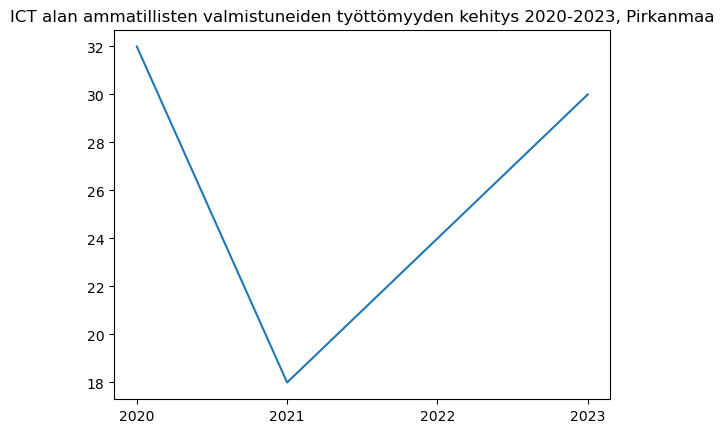

In [112]:
col_unemployed_after_one_year='Työttömät vuosi valmistumisen jälkeen (%)'
df_filtered =  df_selected[(df_selected["Asuinmaakunta"]=='Pirkanmaa') & (df_selected["Sukupuoli"]=='Sukupuolet yhteensä')]
df_filtered[col_unemployed_after_one_year]=df_filtered[col_unemployed_after_one_year].astype('float')
df_filtered['Vuosi']=df_filtered['Vuosi'].astype('string')
plt.plot(df_filtered['Vuosi'], df_filtered[col_unemployed_after_one_year])
plt.title('ICT alan ammatillisten valmistuneiden työttömyyden kehitys 2020-2023, Pirkanmaa')

### Plotting data from 3 regions

We plot data from multiple regions in one image and add a legend. For this to work the data has to be grouped by region (Asuinmaakunta). 


Text(0.5, 1.0, 'ICT alan ammatillisten valmistuneiden työttömyyden kehitys 2020-2023')

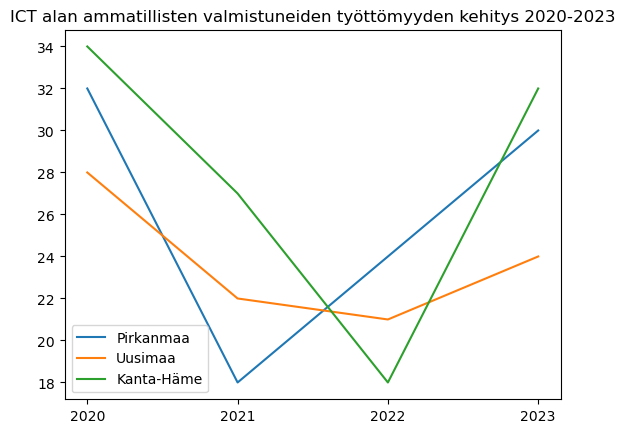

In [ ]:
region_names = ['Pirkanmaa', 'Uusimaa', 'Kanta-Häme']

df_filtered_allgenders = df_selected[(df_selected["Sukupuoli"]=='Sukupuolet yhteensä')]
df_filtered_allgenders = df_filtered_allgenders.replace('.', np.nan) #since there are dots in the data
df_filtered_allgenders[col_unemployed_after_one_year]=df_filtered_allgenders[col_unemployed_after_one_year].astype('float')
df_filtered_allgenders['Vuosi']=df_filtered_allgenders['Vuosi'].astype('string')

df_filtered_allagenders_grouped = df_filtered_allgenders.groupby(by='Asuinmaakunta')

plt.plot(df_filtered['Vuosi'], df_filtered_allagenders_grouped.get_group(region_names[0])[col_unemployed_after_one_year], label=region_names[0])
plt.plot(df_filtered['Vuosi'], df_filtered_allagenders_grouped.get_group(region_names[1])[col_unemployed_after_one_year], label=region_names[1])
plt.plot(df_filtered['Vuosi'], df_filtered_allagenders_grouped.get_group(region_names[2])[col_unemployed_after_one_year], label=region_names[2])
plt.legend()
plt.title('ICT alan ammatillisten valmistuneiden työttömyyden kehitys 2020-2023')

### Plotting all regions in one image

For this we need to loop though all groups. This is easier if we get the keys first.

Text(0.5, 1.0, 'ICT alan ammatillisten valmistuneiden työttömyyden kehitys 2020-2023')

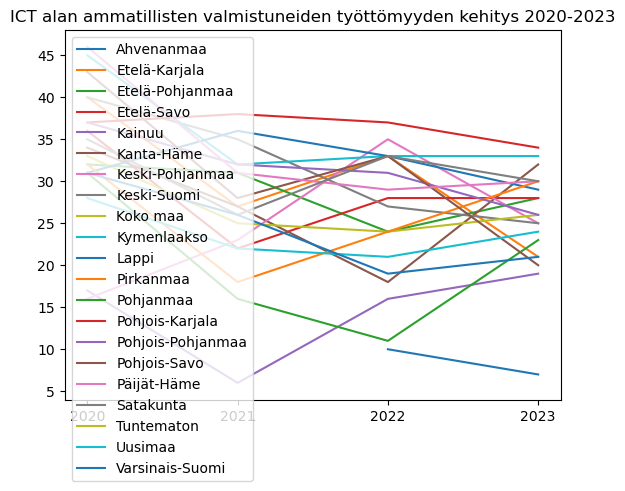

In [96]:
#get all keys
df_filtered_allagenders_grouped_keys = df_filtered_allagenders_grouped.groups.keys()

for r in df_filtered_allagenders_grouped_keys:
    plt.plot(df_filtered['Vuosi'], df_filtered_allagenders_grouped.get_group(r)[col_unemployed_after_one_year], label=r)

plt.legend()
plt.title('ICT alan ammatillisten valmistuneiden työttömyyden kehitys 2020-2023')

These analysis gives not much insight into the data. Let's try longer period and whole country with linear regression. 

### Linear regression

Linear regression fits a linear function to the given dataset. Here is a good explanation about it and how to do it with scikit-learn: 
https://www.activestate.com/resources/quick-reads/how-to-run-linear-regressions-in-python-scikit-learn/ 

For this exercise I downloaded another file from Tilastokeskus: https://pxdata.stat.fi:443/PxWeb/sq/106a78b3-7c86-419b-b5da-727c49a39321 

The data has now years 2007-2023, whole country and all genders. 

coefficient of determination: 0.1785063752276902
intercept: -809.4117647058823
slope: [0.41176471]
Predicted response:
[17.         17.41176471 17.82352941 18.23529412 18.64705882 19.05882353
 19.47058824 19.88235294 20.29411765 20.70588235 21.11764706 21.52941176
 21.94117647 22.35294118 22.76470588 23.17647059 23.58823529]


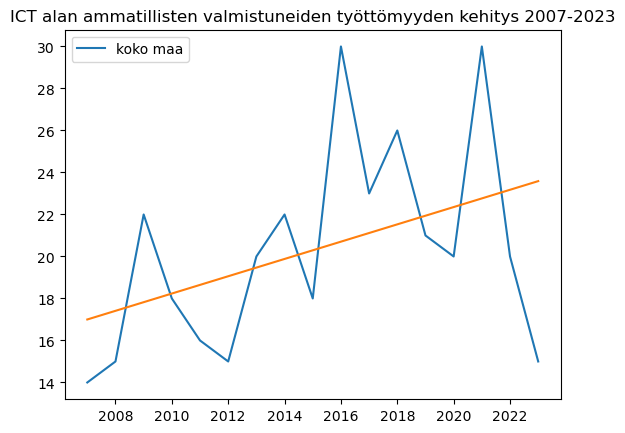

In [ ]:
# load data
if os.path.exists('./csv/tivi_2007_2023.csv'):
   df_long =  pd.read_csv('./csv/tivi_2007_2023.csv', encoding='ISO-8859-1', delimiter=';', engine='python', skiprows=2)

df_long[col_unemployed_after_one_year]=df_long[col_unemployed_after_one_year].astype('float')
df_long['Vuosi']=df_long['Vuosi'].astype('int')

# plot data
plt.plot(df_long['Vuosi'], df_long[col_unemployed_after_one_year], label='koko maa')

plt.legend()
plt.title('ICT alan ammatillisten valmistuneiden työttömyyden kehitys 2007-2023')

#fitting a linear model to the data:
lr = linear_model.LinearRegression()
X = np.array(df_long['Vuosi']).reshape((-1, 1))
y = np.array(df_long[col_unemployed_after_one_year])

model = lr.fit(X, y)
model.score(X, y)

# The following section will get results by interpreting the created instance: 
# Obtain the coefficient of determination by calling the model with the score() function, then print the coefficient:
r_sq = model.score(X, y)
print('coefficient of determination:', r_sq)
# Print the Intercept:
print('intercept:', model.intercept_)
# Print the Slope:
print('slope:', model.coef_) 
# Predict a Response and print it:
y_pred = model.predict(X)
print('Predicted response:', y_pred, sep='\n')

plt.plot(df_long['Vuosi'], y_pred)
